In [1]:
#Wczytanie bibliotek.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Zmienienie stylu wyświetlanych tabel i ilości cyfr po przecinku w tabeli.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
#Wczytanie zbioru danych.
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [7]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0


In [5]:
#Zmienienie nazwy zmiennej "Residence_type" i usunięcie ze zbioru zmiennej "id", gdyż służy ona tylko do określenia indeksu wiersza.
df.rename(columns = {"Residence_type":"residence_type"}, inplace = True)
df.drop(columns="id", inplace = True)

In [6]:
#Sprawdzanie ile zbiór posiada zduplikowanych obserwacji.
df.duplicated().sum()

0

In [7]:
#Wyświetlenie podstawowych informacji o zbiorze danych (typ zmiennych, ilość brakujących i unikatowych wartości poszczególnych zmiennych).
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,unique,count
gender,object,0,0.000000,3,5110
age,float64,0,0.000000,104,5110
hypertension,int64,0,0.000000,2,5110
heart_disease,int64,0,0.000000,2,5110
ever_married,object,0,0.000000,2,5110
work_type,object,0,0.000000,5,5110
residence_type,object,0,0.000000,2,5110
avg_glucose_level,float64,0,0.000000,3979,5110
bmi,float64,201,0.039335,418,4909
smoking_status,object,0,0.000000,4,5110


In [8]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1
5,Male,81.000,0,0,Yes,Private,Urban,186.210,29.000,formerly smoked,1
6,Male,74.000,1,1,Yes,Private,Rural,70.090,27.400,never smoked,1
7,Female,69.000,0,0,No,Private,Urban,94.390,22.800,never smoked,1
8,Female,59.000,0,0,Yes,Private,Rural,76.150,NaN,Unknown,1
9,Female,78.000,0,0,Yes,Private,Urban,58.570,24.200,Unknown,1


In [9]:
df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,Male,82.000,1,0,Yes,Self-employed,Rural,71.970,28.300,never smoked,0
5101,Female,45.000,0,0,Yes,Private,Urban,97.950,24.500,Unknown,0
5102,Female,57.000,0,0,Yes,Private,Rural,77.930,21.700,never smoked,0
5103,Female,18.000,0,0,No,Private,Urban,82.850,46.900,Unknown,0
5104,Female,13.000,0,0,No,children,Rural,103.080,18.600,Unknown,0
5105,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0
5109,Female,44.000,0,0,Yes,Govt_job,Urban,85.280,26.200,Unknown,0


In [10]:
#Wyświetlenie kilku statystyk opisowych i wybranych percentylów zbioru.
#Przy okazji szukam potencjalne wartości odstające między min a 1% i między 99% a max.
df.describe(percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], include = "all").T

,count,unique,top,freq,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.000,NaN,NaN,NaN,43.227,22.613,0.080,1.080,5.000,25.000,45.000,61.000,79.000,82.000,82.000
hypertension,5110.000,NaN,NaN,NaN,0.097,0.297,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
heart_disease,5110.000,NaN,NaN,NaN,0.054,0.226,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.000,NaN,NaN,NaN,106.148,45.284,55.120,56.331,60.714,77.245,91.885,114.090,216.295,240.708,271.740
bmi,4909.000,NaN,NaN,NaN,28.893,7.854,10.300,15.100,17.640,23.500,28.100,33.100,42.960,53.400,97.600
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Wyświetlenie wartości jakie przyjmują zmienne jakościowe.
for col in df.columns.drop(["age","avg_glucose_level","bmi"]):
    print(df[col].value_counts(),"\n")

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

hypertension
0    4612
1     498
Name: count, dtype: int64 

heart_disease
0    4834
1     276
Name: count, dtype: int64 

ever_married
Yes    3353
No     1757
Name: count, dtype: int64 

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64 

stroke
0    4861
1     249
Name: count, dtype: int64 



In [12]:
#Usunięcie wiersza ze zbioru, w którym płeć jakiejś osoby była zapisana jako "other", aby zmienić typ zmiennej "gender" na binarny.
df = df.drop(df[df["gender"]=="Other"].index)
df.reset_index(drop=True, inplace=True)

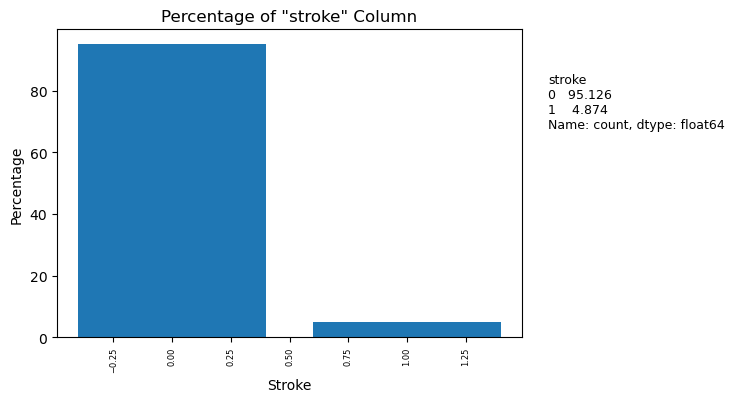

In [13]:
#Stosunek osób, które nie miały i miały udar mózgu.
#Sprawdzam czy zmienna celu jest zbalansowana. Nie jest zbalansowana.
counts = df['stroke'].value_counts()
percentages = counts / counts.sum() * 100

plt.figure(figsize=(6, 4))
plt.bar(percentages.index, percentages.values)
plt.title('Percentage of "stroke" Column')
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.text(1.6, 68, f"{percentages}", fontsize=9, color='black')
plt.xticks(fontsize=6, rotation = 90)
plt.show()

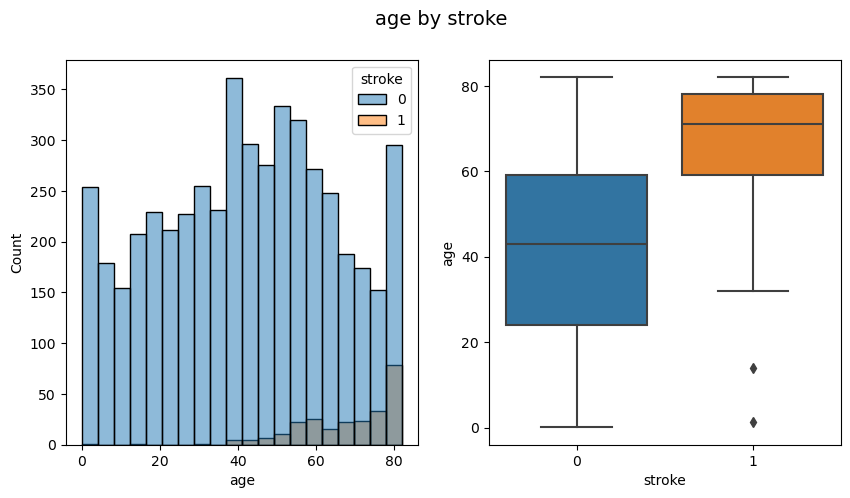

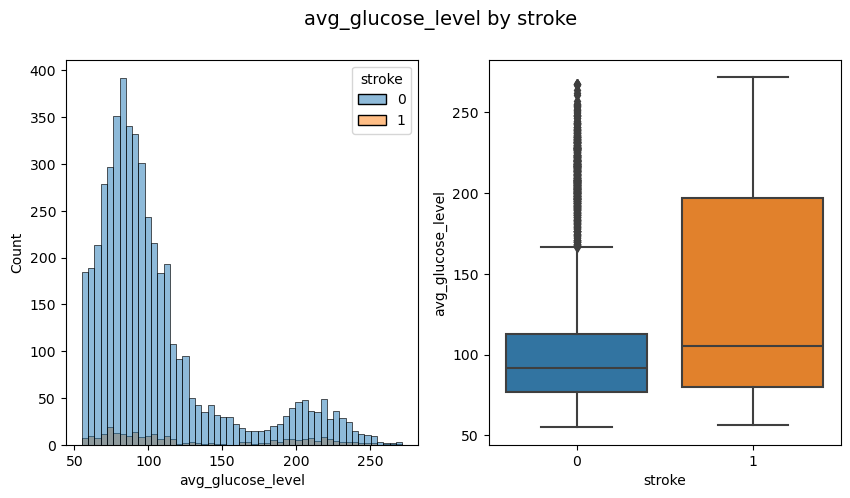

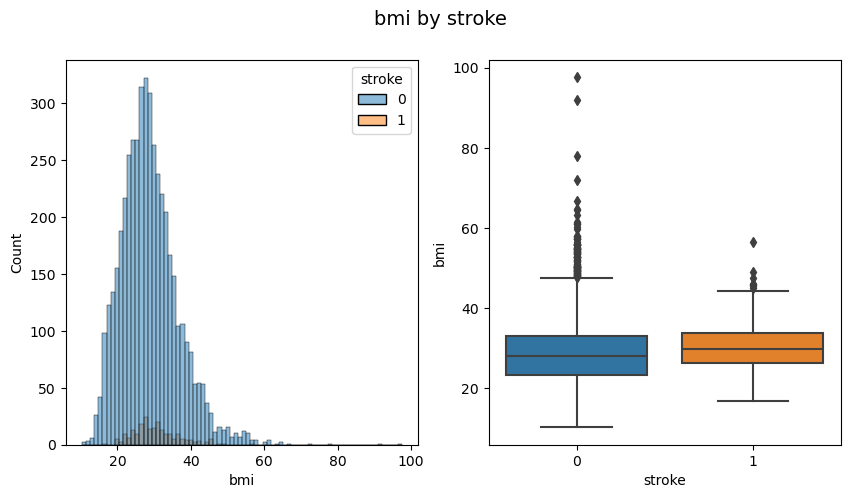

In [14]:
#Wyświetlenie histogramów i boxplotów zmiennych ilościowych z podziałem na osoby, które nie miały i miały udar mózgu.
#Szukam potencjalne wartości odstające.
columns1 = ["age","avg_glucose_level","bmi"]

for col in columns1:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=df, x=col, hue='stroke', ax=ax1)
    sns.boxplot(data=df, x='stroke', y=col, ax=ax2)
    fig.suptitle(f'{col} by stroke', fontsize=14)
    plt.show()

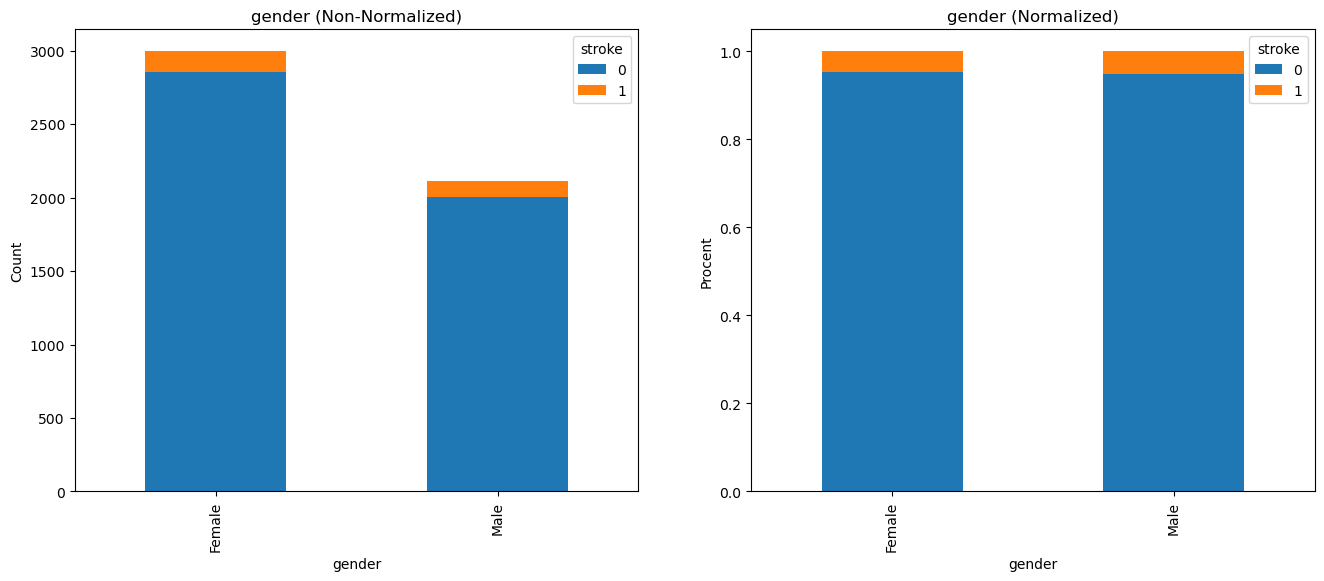

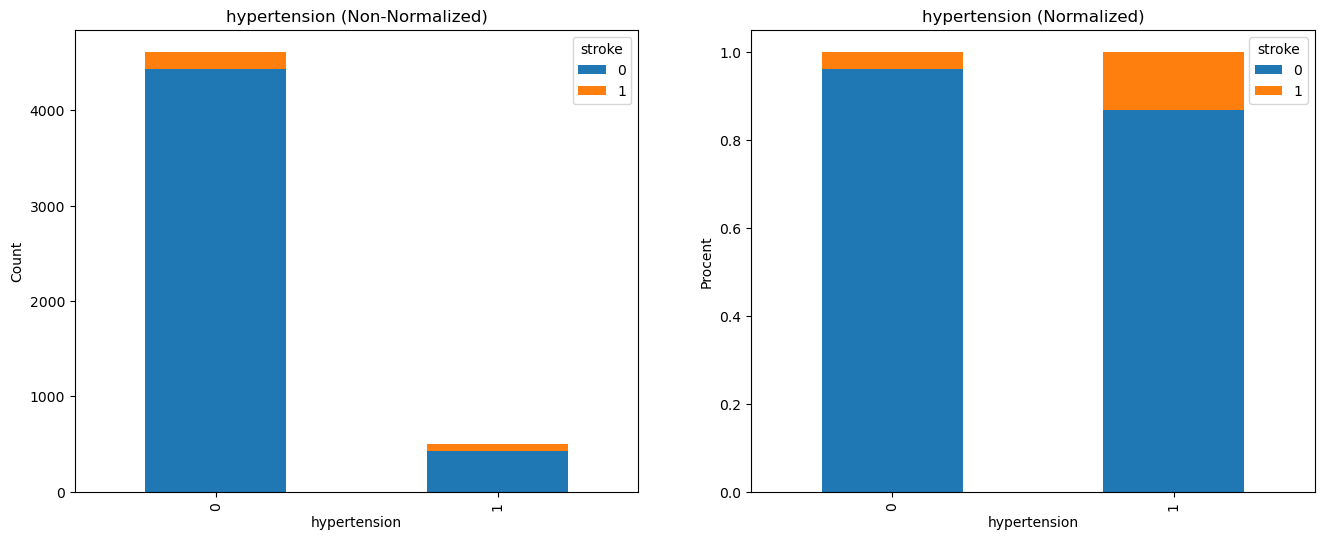

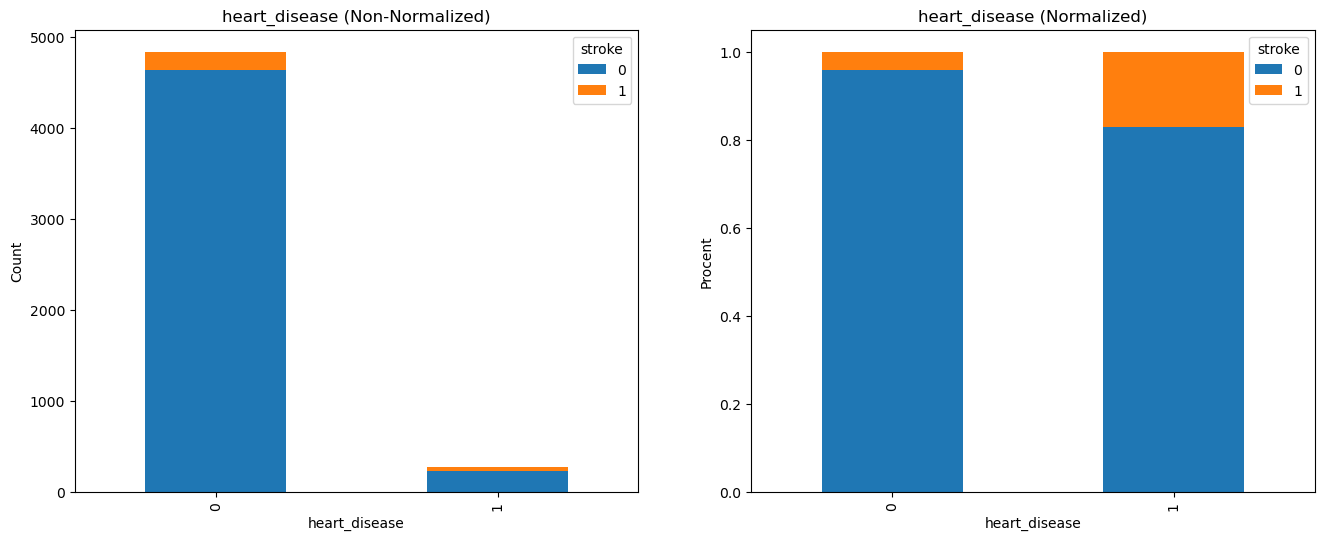

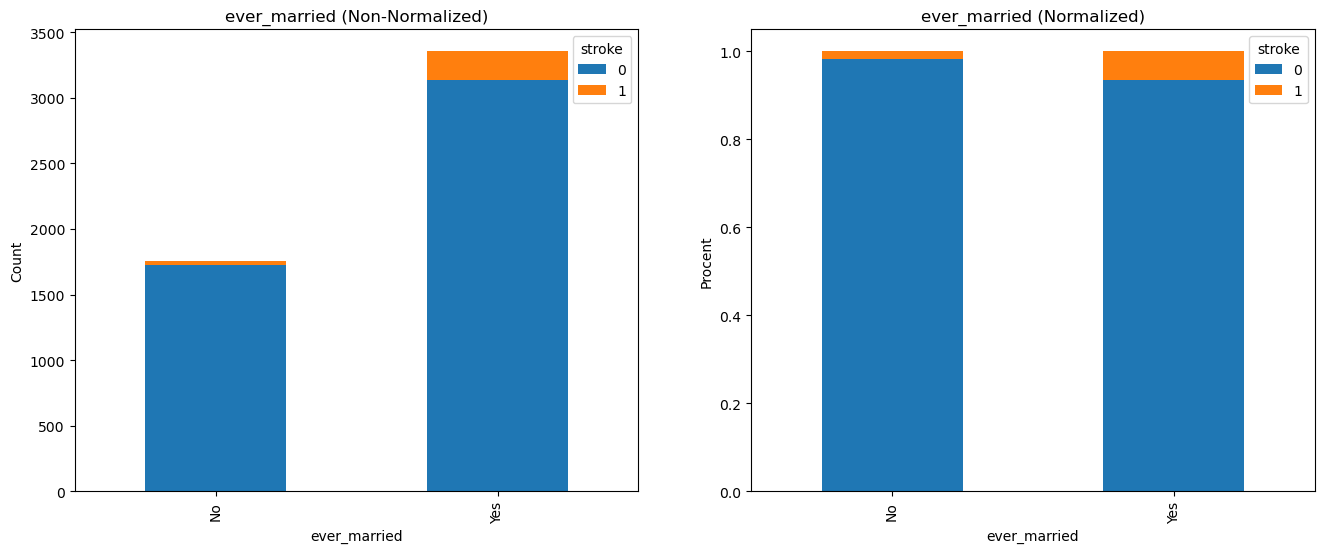

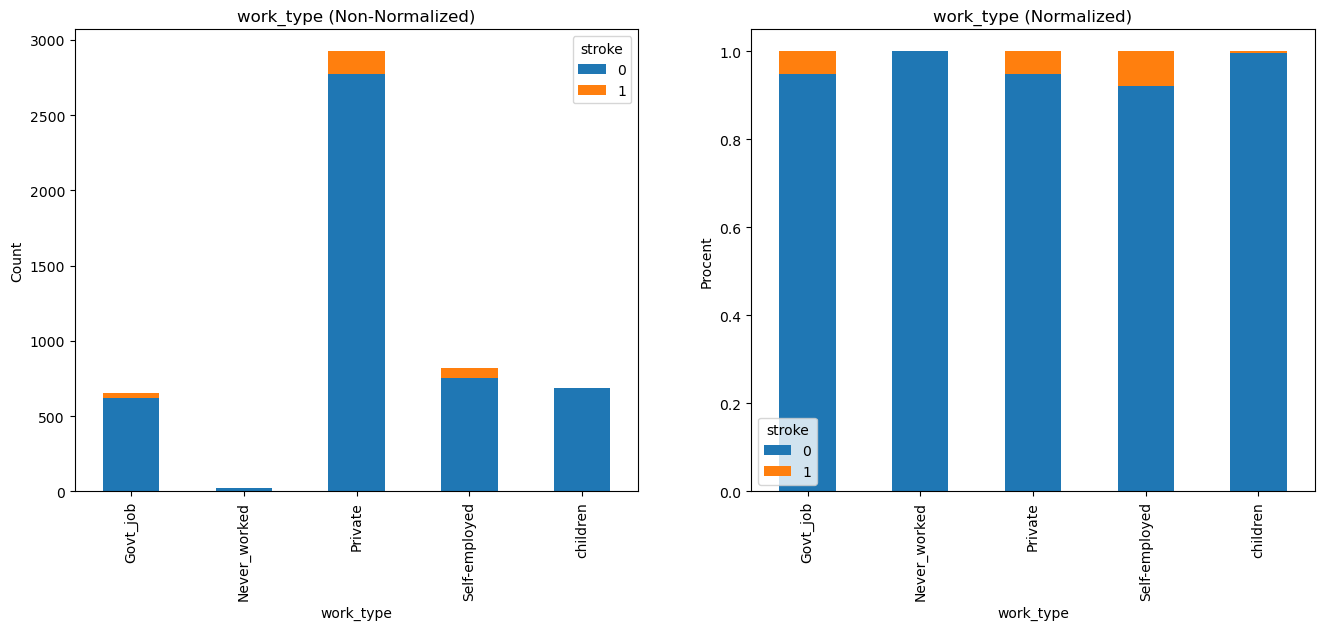

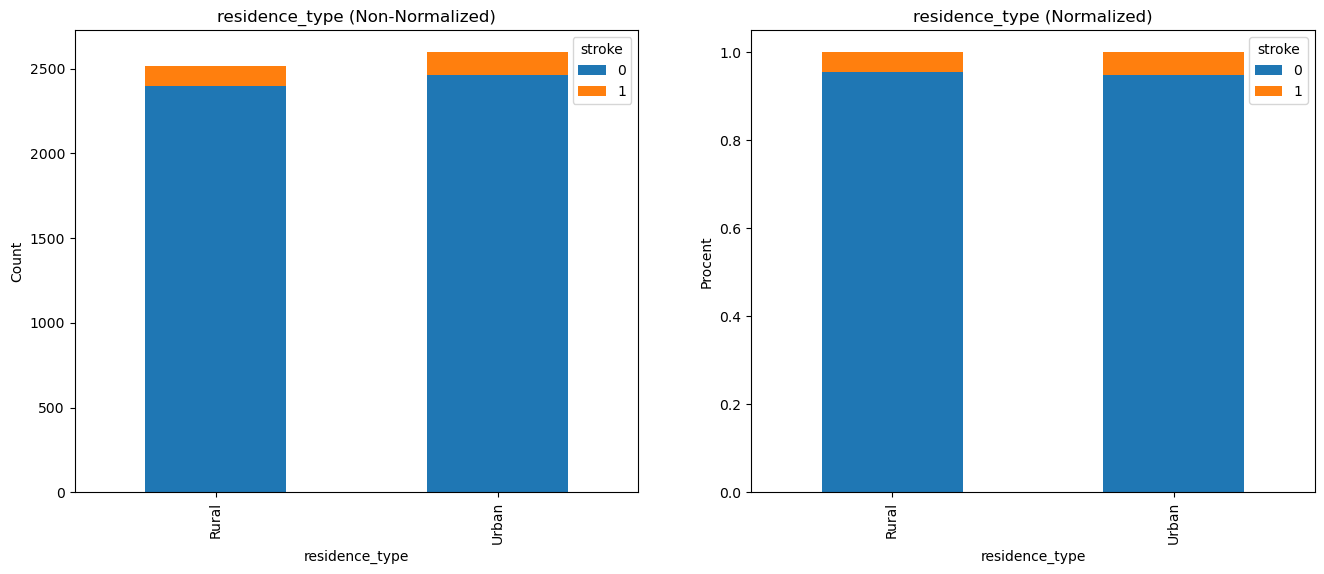

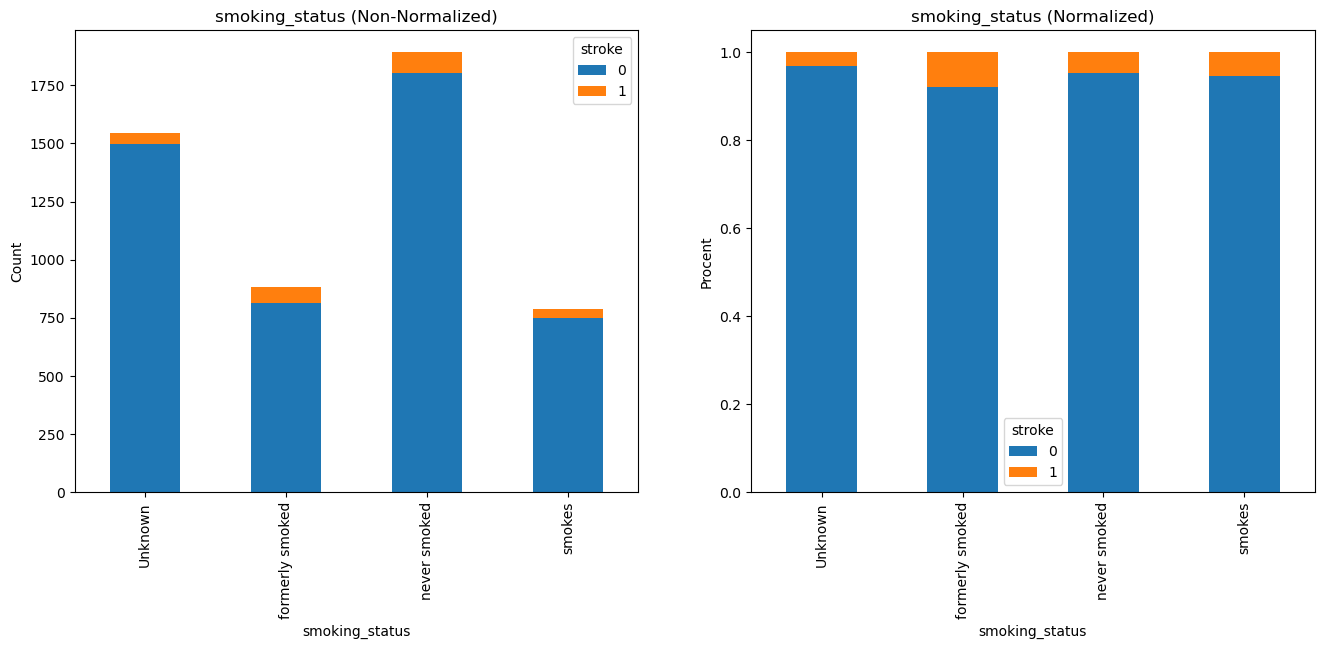

In [15]:
#Wyświetlenie proporcji wartości jakie przyjmują zmienne jakościowe (nieznormalizowane i znormalizowane) z podziałem na osoby, które nie 
#miały i miały udar mózgu.
#Szukam potencjalnych zmiennych objaśniających, które można usunąć ze zbioru, gdyż mogą one nie mieć prawie żadnego wpływu na model.
#Sprawdzam także jakie wartości zmiennych występują relatywnie rzadko w celu ich połączenia.
columns2 = ["gender","hypertension","heart_disease","ever_married","work_type","residence_type","smoking_status"]

for col in columns2:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    df.groupby(col)['stroke'].value_counts(normalize=False).unstack().plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title(col + ' (Non-Normalized)')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')

    df.groupby(col)['stroke'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax[1])
    ax[1].set_title(col + ' (Normalized)')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Procent')

    plt.show()

In [16]:
#Na podstawie wzrokowej oceny powyżej zwizualizowanych, pogrupowanych zmiennych postanowiono:
df.drop(columns=["gender", "residence_type"], inplace = True) #usunąć te zmienne ze zbioru, gdyż to czy dana osoba była mężczyzną czy kobietą
                                                              #nie miało prawie żadnego wpływu na to czy ten ktoś miał udar mózgu. Podobny 
                                                              #wniosek wyciągnąłem na podstawie znormalizowanego wykresu zmiennej 
                                                              #"residence_type".
df["work_type"].replace(["Never_worked","children","Govt_job","Self-employed"], "Not_private", inplace = True) 
                         #połączyć ze sobą wartości "Never_worked", "children", "Govt_job" i "Self-employed" z kolumny "work_type", gdyż 
                         #były one nieliczne

In [232]:
#Utworzenie kopii zbioru danych, aby zmienić typ niektórych zmiennych jakościowych na ilościowy.
df_num = df.copy()

In [233]:
df_num['ever_married']=df_num['ever_married'].map({"No": 0, "Yes": 1})
df_num['work_type']=df_num['work_type'].map({"Not_private": 0,"Private": 1})
df_num['smoking_status']=df_num['smoking_status'].map({"Unknown": 0,"never smoked": 1,"formerly smoked": 2,"smokes": 3})

In [234]:
#Ponowne wyświetlenie ilości brakujących danych w poszczególnych kolumnach.
df_num.isnull().mean() * 100

age                 0.000
hypertension        0.000
heart_disease       0.000
ever_married        0.000
work_type           0.000
avg_glucose_level   0.000
bmi                 3.934
smoking_status      0.000
stroke              0.000
dtype: float64

In [235]:
#Imputacja brakujących danych za pomocą KNNImputer.
from sklearn.impute import KNNImputer

In [236]:
imputer = KNNImputer(n_neighbors=20)
df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num)
df_num.columns = df.columns

#Wyświetlenie ilości brakujących danych w poszczególnych kolumnach po przeprowadzeniu ich imputacji.
df_num_impKNN = df_num.copy()
df_num_impKNN.isnull().mean() * 100

age                 0.000
hypertension        0.000
heart_disease       0.000
ever_married        0.000
work_type           0.000
avg_glucose_level   0.000
bmi                 0.000
smoking_status      0.000
stroke              0.000
dtype: float64

E:\Programy2\Anaconda\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


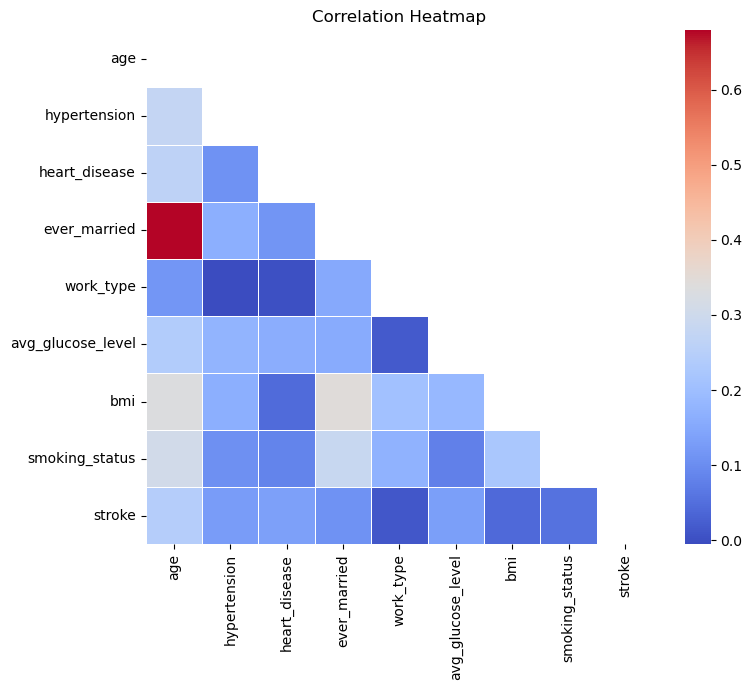

In [237]:
#Wizualizacja korelacji Pearsona.
#Szukam zmiennych wysoko skorelowanych w celu usunięcia ich ze zbioru.
plt.figure(figsize=(8, 7))
corr = df_num_impKNN.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', linewidth=.5, annot_kws={'size': 7})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [238]:
#Wyświetlenie tych korelacji, które osiągnęły wartość większą niż 0.4.
corr_triu = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1)).stack().sort_values()
corr_triu[abs(corr_triu)>0.4]

age  ever_married   0.679
dtype: float64

In [239]:
#Na podstawie wyświetlonej korelacji postanowiono usunąć ze zbioru zmienną "ever_married", gdyż zmienna "age" jest ilościowa, zatem można ją
#edytować poprzez usuwanie jej wartości odstających, co zostało uczynione w następnej części raportu.
df_num_impKNN.drop(columns=["ever_married"], inplace = True)

In [240]:
#Ponowne wyświetlenie tych korelacji, które osiągnęły wartość większą niż 0.4, po usunięciu wybranych zmiennych ze zbioru.
corr = df_num_impKNN.corr()
corr_triu = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1)).stack().sort_values()
corr_triu[abs(corr_triu)>0.4]

Series([], dtype: float64)

In [241]:
#Ponowne wyświetlenie kilku statystyk opisowych i wybranych percentylów zbioru po jego edycji.
df_num_impKNN.describe(percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], include = "all").T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
age,5109.000,43.230,22.614,0.080,1.080,5.000,25.000,45.000,61.000,79.000,82.000,82.000
hypertension,5109.000,0.097,0.297,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
heart_disease,5109.000,0.054,0.226,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
work_type,5109.000,0.572,0.495,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
avg_glucose_level,5109.000,106.140,45.285,55.120,56.331,60.712,77.240,91.880,114.090,216.304,240.708,271.740
bmi,5109.000,28.946,7.747,10.300,15.108,17.700,23.700,28.270,33.000,42.660,52.892,97.600
smoking_status,5109.000,1.180,1.030,0.000,0.000,0.000,0.000,1.000,2.000,3.000,3.000,3.000
stroke,5109.000,0.049,0.215,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000


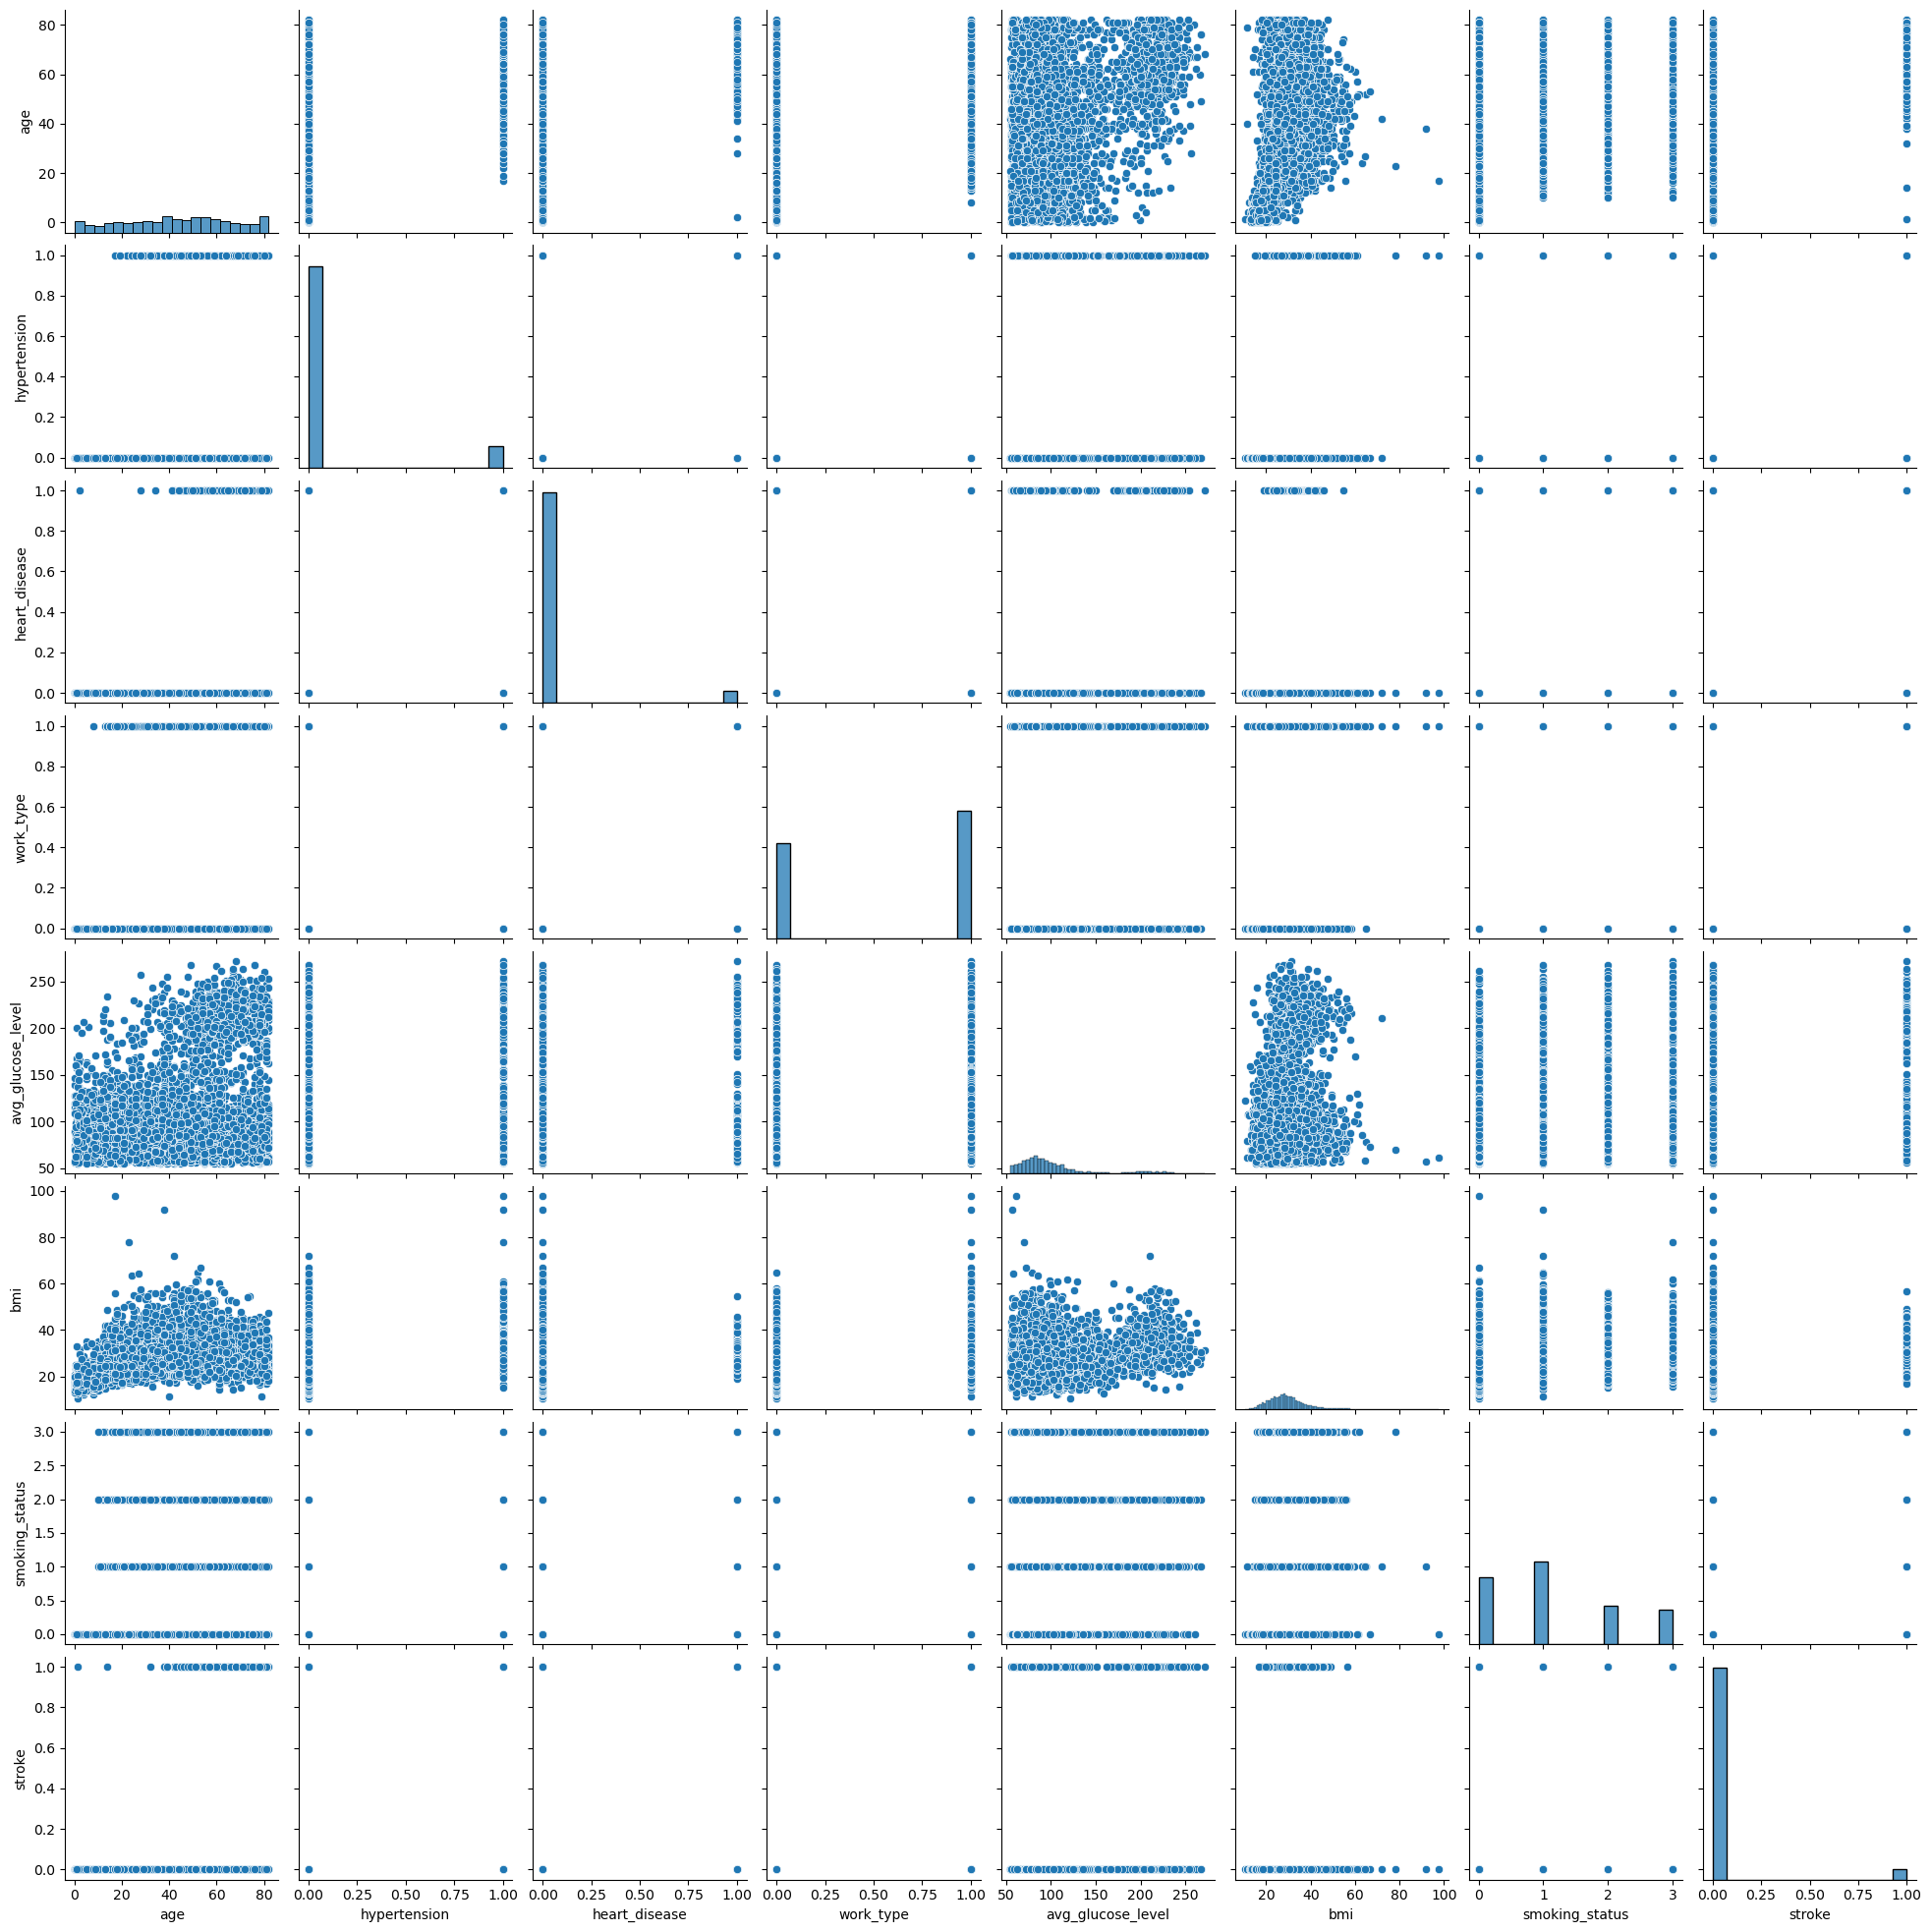

In [27]:
#Wizualizacja wartości poszczególnych zmiennych w stosunku do wartości innych zmiennych.
sns.pairplot(df_num_impKNN)
plt.show()

In [34]:
#Wczytanie bibliotek potrzebnych do utworzenia modelów i do ich ocenienia poprzez wybrane metryki.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.model_selection import cross_val_score

import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [242]:
#Podzielenie zbioru danych na zbiór treningowy i testowy.
X_train, X_test, y_train, y_test = train_test_split(df_num_impKNN.drop(columns=['stroke']),
                                                    df_num_impKNN['stroke'], test_size=0.2, random_state=0)

#Przypisanie do zmiennej nazw kolumn, które mają typ ilościowy.
var_num = X_train.select_dtypes(include=['int64', 'float64']).columns
var_num

Index(['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

In [243]:
#Wybrane klasyfikatory, z ustawionymi bazowymi hiperparametrami, do sprawdzenia, który z nich najbardziej się nadaje do utworzenia z jego 
#użyciem modelu.
names = ['LogisticRegression', 'BaggingClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'XGBClassifier', 'LGBMClassifier']
models = [LogisticRegression(), BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(), XGBClassifier(), LGBMClassifier()]

>LogisticRegression 0.211 (0.012)
>BaggingClassifier 0.217 (0.035)
>RandomForestClassifier 0.230 (0.034)
>AdaBoostClassifier 0.237 (0.026)
>XGBClassifier 0.234 (0.030)
>LGBMClassifier 0.234 (0.039)


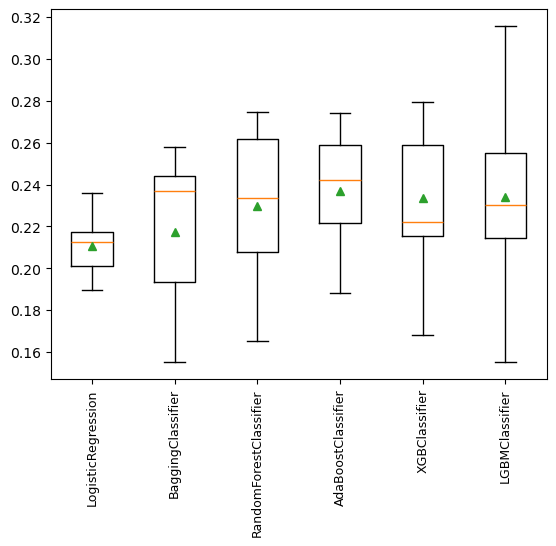

In [245]:
#Sprawdzenie, który z wybranych klasyfikatorów z ustawionymi bazowymi hiperparametrami osiągnie najlepszy wynik pod kątem metryki "f1-score".
results = list()
for i in range(len(names)):
    pipeline = Pipeline(
        steps=[
            ('smoteenn', SMOTEENN(random_state=1234)),
            ('model', models[i])
        ])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(fontsize=9, rotation = 90)
plt.show()

In [55]:
#Wczytanie biblioteki optuna w celu znalezienia potencjalnie najlepszych hiperparametrów wybranego klasyfikatora.
import optuna

In [56]:
#Konfiguracja zakresu hiperparametrów AdaBoostClassifier.
def objective_AdaBoostClassifier(trial, X_train, y_train, X_test, y_test):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 1, 1000),
        'learning_rate': trial.suggest_float("learning_rate", 1e-10, 1.0),
        'algorithm': trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"]),
    }

    model = AdaBoostClassifier(**params)

    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

In [57]:
#Uruchomienie szukania potecjnalnie najlepszych hiperparametrów AdaBoostClassifier.
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=123))
study.optimize(lambda trial: objective_AdaBoostClassifier(trial, X_train, y_train, X_test, y_test), n_trials=250, n_jobs=-1)

[I 2023-12-28 21:41:25,120] A new study created in memory with name: no-name-53403010-9ebc-4bf7-aefc-cfa472ca5f35
[I 2023-12-28 21:41:26,883] Trial 6 finished with value: 0.22164948453608246 and parameters: {'n_estimators': 44, 'learning_rate': 0.24222042598211138, 'algorithm': 'SAMME'}. Best is trial 6 with value: 0.22164948453608246.
[I 2023-12-28 21:41:26,936] Trial 0 finished with value: 0.2279202279202279 and parameters: {'n_estimators': 37, 'learning_rate': 0.23698381187961304, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.2279202279202279.
[I 2023-12-28 21:41:35,532] Trial 9 finished with value: 0.23863636363636365 and parameters: {'n_estimators': 258, 'learning_rate': 0.5514976536301498, 'algorithm': 'SAMME.R'}. Best is trial 9 with value: 0.23863636363636365.
[I 2023-12-28 21:41:38,141] Trial 5 finished with value: 0.2528735632183908 and parameters: {'n_estimators': 319, 'learning_rate': 0.3107042934222937, 'algorithm': 'SAMME.R'}. Best is trial 5 with value: 0.252873

In [58]:
#Wyświetlenie najlepszych znalezionych hiperparametrów AdaBoostClassifier.
best_params = study.best_params
print(best_params, study.best_value)

{'n_estimators': 539, 'learning_rate': 0.3561786046234006, 'algorithm': 'SAMME.R'} 0.2874251497005988


In [59]:
#Zbudowanie modelu z użyciem AdaBoostClassifier z ustawionymi znalezionymi hiperparametrami i wyświetlenie metryk oceniających jego jakość.
model = AdaBoostClassifier(**best_params)
pipeline = Pipeline([
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_test))
print("Confussion_matrix:\n", confusion_matrix(y_test, y_pred_test))
print('ROC AUC score:', roc_auc_score(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       968
         1.0       0.21      0.44      0.29        54

    accuracy                           0.88      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.93      0.88      0.90      1022

Confussion_matrix:
 [[879  89]
 [ 30  24]]
ROC AUC score: 0.6762511478420569


In [60]:
#Konfiguracja zakresu hiperparametrów LGBMClassifier.
def objective_LGBMClassifier(trial, X_train, y_train, X_test, y_test):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical("boosting_type", ["gbdt", "dart", "rf"]),
        'n_estimators': trial.suggest_int("n_estimators", 1, 1000),
        'lambda_l1': trial.suggest_float("lambda_l1", 1e-10, 10.0, log=True),
        'lambda_l2': trial.suggest_float("lambda_l2", 1e-10, 10.0, log=True),
        'learning_rate': trial.suggest_float("learning_rate", 1e-10, 10.0, log=True),
        'num_leaves': trial.suggest_int("num_leaves", 2, 300),
        'feature_fraction': trial.suggest_float("feature_fraction", 0.1, 1.0),
        'bagging_fraction': trial.suggest_float("bagging_fraction", 0.1, 1.0),
        'bagging_freq': trial.suggest_int("bagging_freq", 1, 20),
        'min_child_samples': trial.suggest_int("min_child_samples", 1, 300),
        'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 1, 300),
        'max_depth': trial.suggest_int("n_estimators", 1, 300),
        'class_weight': trial.suggest_categorical("class_weight", ["balanced", None]),
        'subsample': trial.suggest_float("subsample", 1e-10, 1.0),
        'reg_alpha': trial.suggest_float("reg_alpha", 1e-10, 1.0),
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-10, 1.0),
        'min_split_gain': trial.suggest_float("min_split_gain", 0.0001, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.0001, 1.0),
        'min_child_weight': trial.suggest_float("min_child_weight", 0.0001, 1.0)
    }

    model = LGBMClassifier(**params)

    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

In [61]:
#Uruchomienie szukania potecjnalnie najlepszych hiperparametrów LGBMClassifier.
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=123))
study.optimize(lambda trial: objective_LGBMClassifier(trial, X_train, y_train, X_test, y_test), n_trials=250, n_jobs=-1)

[I 2023-12-28 21:48:50,431] A new study created in memory with name: no-name-d57e60b8-d39e-4909-b961-6121b14b76ae
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 1000}
  warnings.warn(
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all follow

In [62]:
#Wyświetlenie najlepszych znalezionych hiperparametrów LGBMClassifier.
best_params = study.best_params
print(best_params, study.best_value)

{'boosting_type': 'rf', 'n_estimators': 290, 'lambda_l1': 1.7141069957208237, 'lambda_l2': 0.8975080720976906, 'learning_rate': 0.0008944300441174189, 'num_leaves': 208, 'feature_fraction': 0.4466043201994818, 'bagging_fraction': 0.5374613458630104, 'bagging_freq': 4, 'min_child_samples': 288, 'min_data_in_leaf': 73, 'class_weight': 'balanced', 'subsample': 0.3595843671725712, 'reg_alpha': 0.8649030652574701, 'reg_lambda': 0.05096605548366345, 'min_split_gain': 0.5147935193226183, 'colsample_bytree': 0.9003613541101005, 'min_child_weight': 0.22690799484380444} 0.33519553072625696


In [63]:
#Zbudowanie modelu z użyciem LGBMClassifier z ustawionymi znalezionymi hiperparametrami i wyświetlenie metryk oceniających jego jakość.
model = LGBMClassifier(**best_params)
pipeline = Pipeline([
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_test))
print("Confussion_matrix:\n", confusion_matrix(y_test, y_pred_test))
print('ROC AUC score:', roc_auc_score(y_test, y_pred_test))

[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=288 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] feature_fraction is set=0.4466043201994818, colsample_bytree=0.9003613541101005 will be ignored. Current value: feature_fraction=0.4466043201994818
[LightGBM] [Warning] lambda_l1 is set=1.7141069957208237, reg_alpha=0.8649030652574701 will be ignored. Current value: lambda_l1=1.7141069957208237
[LightGBM] [Warning] lambda_l2 is set=0.8975080720976906, reg_lambda=0.05096605548366345 will be ignored. Current value: lambda_l2=0.8975080720976906
[LightGBM] [Warning] bagging_fraction is set=0.5374613458630104, subsample=0.3595843671725712 will be ignored. Current value: bagging_fraction=0.5374613458630104
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=288 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warni

In [272]:
#Utworzenie kopii df_num_impKNN, aby z nowego zbioru usunąć wartości odstające.
df_no_outl_iqr = df_num_impKNN.copy()
df_no_outl_iqr

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.000,0.000,1.000,1.000,228.690,36.600,2.000,1.000
1,61.000,0.000,0.000,0.000,202.210,34.480,1.000,1.000
2,80.000,0.000,1.000,1.000,105.920,32.500,1.000,1.000
3,49.000,0.000,0.000,1.000,171.230,34.400,3.000,1.000
4,79.000,1.000,0.000,0.000,174.120,24.000,1.000,1.000
...,...,...,...,...,...,...,...,...
5104,80.000,1.000,0.000,1.000,83.750,26.995,1.000,0.000
5105,81.000,0.000,0.000,0.000,125.200,40.000,1.000,0.000
5106,35.000,0.000,0.000,0.000,82.990,30.600,1.000,0.000
5107,51.000,0.000,0.000,1.000,166.290,25.600,2.000,0.000


In [273]:
#Ponowne wyświetlenie kilku statystyk opisowych i wybranych percentylów zbioru w celu znalezienia wartości odstających do usunięcia.
df_num_impKNN.describe(percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], include = "all").T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
age,5109.000,43.230,22.614,0.080,1.080,5.000,25.000,45.000,61.000,79.000,82.000,82.000
hypertension,5109.000,0.097,0.297,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
heart_disease,5109.000,0.054,0.226,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
work_type,5109.000,0.572,0.495,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
avg_glucose_level,5109.000,106.140,45.285,55.120,56.331,60.712,77.240,91.880,114.090,216.304,240.708,271.740
bmi,5109.000,28.946,7.747,10.300,15.108,17.700,23.700,28.270,33.000,42.660,52.892,97.600
smoking_status,5109.000,1.180,1.030,0.000,0.000,0.000,0.000,1.000,2.000,3.000,3.000,3.000
stroke,5109.000,0.049,0.215,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000


In [274]:
#Ze względu na to, że nie mam odpowiedniej wiedzy medycznej potrzebnej do ocenienia jakie wartości odstające mogę usunąć ze zbioru to 
#uznałem, że na podstawie wyżej zwizualizowanych boxplotów i wypisanych konkretnych percentylów jak i wartości minimalnych oraz maksymalnych
#oraz metody prób i błędów usune ze zbioru te wartości odstające zmiennych "avg_glucose_level" i "bmi", które są mniejsze od około 
#percentyla 1% i większe od około percentyla 99%. Dodatkowo uznałem, że usune wartości odstające tylko osób, które nie miały udaru mózgu, 
#gdyż po usunięciu ze zbioru wartości odstających osób, które miały udar mózgu, model osiąga gorsze wyniki.
agl_out = df_no_outl_iqr[(df_no_outl_iqr["stroke"] == 0) & (df_no_outl_iqr["avg_glucose_level"] > 237)]
agl_out #To są obserwacje, które zostaną usunięte ze zbioru.

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
256,75.000,0.000,1.000,0.000,243.530,27.000,1.000,0.000
303,66.000,0.000,0.000,1.000,242.300,35.300,3.000,0.000
330,78.000,0.000,0.000,1.000,243.500,26.100,1.000,0.000
343,64.000,0.000,0.000,0.000,239.640,34.600,2.000,0.000
386,70.000,1.000,0.000,0.000,251.600,27.100,1.000,0.000
552,52.000,0.000,0.000,1.000,247.690,35.100,0.000,0.000
563,72.000,0.000,0.000,0.000,239.820,35.800,1.000,0.000
708,59.000,0.000,0.000,1.000,240.710,43.900,2.000,0.000
755,64.000,0.000,0.000,1.000,250.200,27.400,0.000,0.000
785,69.000,0.000,1.000,1.000,254.600,21.700,0.000,0.000


In [275]:
#Wyświetlenie zbioru, który pozostał po usunięciu z niego powyższych wartości odstających.
df_no_outl_iqr = df_no_outl_iqr.drop(agl_out.index)
df_no_outl_iqr.reset_index(drop=True, inplace=True)
df_no_outl_iqr

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.000,0.000,1.000,1.000,228.690,36.600,2.000,1.000
1,61.000,0.000,0.000,0.000,202.210,34.480,1.000,1.000
2,80.000,0.000,1.000,1.000,105.920,32.500,1.000,1.000
3,49.000,0.000,0.000,1.000,171.230,34.400,3.000,1.000
4,79.000,1.000,0.000,0.000,174.120,24.000,1.000,1.000
...,...,...,...,...,...,...,...,...
5045,80.000,1.000,0.000,1.000,83.750,26.995,1.000,0.000
5046,81.000,0.000,0.000,0.000,125.200,40.000,1.000,0.000
5047,35.000,0.000,0.000,0.000,82.990,30.600,1.000,0.000
5048,51.000,0.000,0.000,1.000,166.290,25.600,2.000,0.000


In [276]:
bmi_out = df_no_outl_iqr[((df_no_outl_iqr["stroke"] == 0) & (df_no_outl_iqr["bmi"] < 15.2)) 
                        | ((df_no_outl_iqr["stroke"] == 0) & (df_no_outl_iqr["bmi"] > 50))]
bmi_out #To są obserwacje, które zostaną usunięte ze zbioru.

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
254,47.000,0.000,0.000,1.000,210.950,50.100,0.000,0.000
257,74.000,1.000,0.000,0.000,205.840,54.600,1.000,0.000
269,57.000,1.000,0.000,1.000,129.540,60.900,3.000,0.000
330,52.000,0.000,0.000,1.000,82.240,54.700,2.000,0.000
354,52.000,0.000,0.000,0.000,78.400,64.800,1.000,0.000
...,...,...,...,...,...,...,...,...
4782,51.000,0.000,0.000,1.000,107.720,60.900,0.000,0.000
4850,53.000,0.000,0.000,1.000,70.510,54.100,1.000,0.000
4869,10.000,0.000,0.000,0.000,69.840,13.700,0.000,0.000
4872,9.000,0.000,0.000,0.000,84.400,14.900,0.000,0.000


In [277]:
#Wyświetlenie zbioru, który pozostał po usunięciu z niego powyższych wartości odstających.
df_no_outl_iqr = df_no_outl_iqr.drop(bmi_out.index)
df_no_outl_iqr.reset_index(drop=True, inplace=True)
df_no_outl_iqr

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.000,0.000,1.000,1.000,228.690,36.600,2.000,1.000
1,61.000,0.000,0.000,0.000,202.210,34.480,1.000,1.000
2,80.000,0.000,1.000,1.000,105.920,32.500,1.000,1.000
3,49.000,0.000,0.000,1.000,171.230,34.400,3.000,1.000
4,79.000,1.000,0.000,0.000,174.120,24.000,1.000,1.000
...,...,...,...,...,...,...,...,...
4916,80.000,1.000,0.000,1.000,83.750,26.995,1.000,0.000
4917,81.000,0.000,0.000,0.000,125.200,40.000,1.000,0.000
4918,35.000,0.000,0.000,0.000,82.990,30.600,1.000,0.000
4919,51.000,0.000,0.000,1.000,166.290,25.600,2.000,0.000


In [278]:
#Wyświetlenie statystyki opisowej i wybranych percentyli zbioru, który pozostał po usunięciu z niego powyższych wartości odstających.
df_no_outl_iqr.describe(percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], include = "all").T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
age,4921.000,43.302,22.504,0.080,1.240,5.000,25.000,45.000,61.000,79.000,82.000,82.000
hypertension,4921.000,0.096,0.294,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
heart_disease,4921.000,0.054,0.226,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
work_type,4921.000,0.575,0.494,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
avg_glucose_level,4921.000,104.306,42.661,55.120,56.322,60.670,76.920,91.530,112.790,209.500,231.486,271.740
bmi,4921.000,28.642,6.817,15.200,16.200,18.100,23.800,28.200,32.700,41.300,46.080,56.600
smoking_status,4921.000,1.185,1.028,0.000,0.000,0.000,0.000,1.000,2.000,3.000,3.000,3.000
stroke,4921.000,0.051,0.219,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000


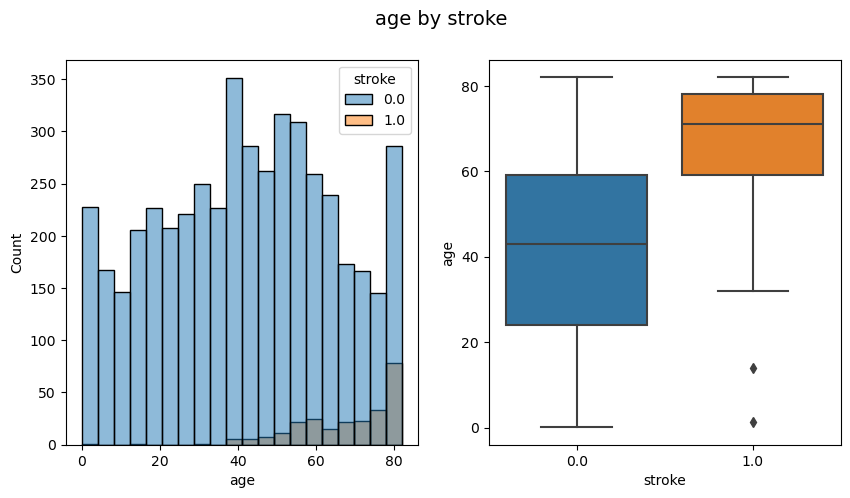

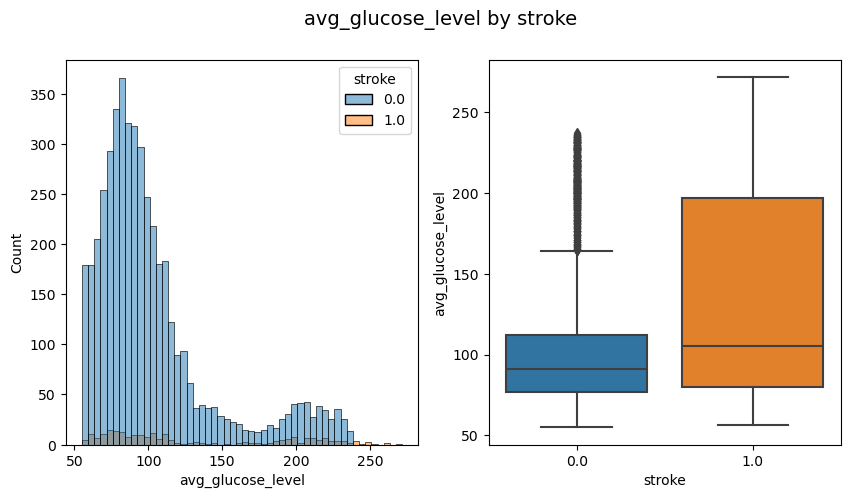

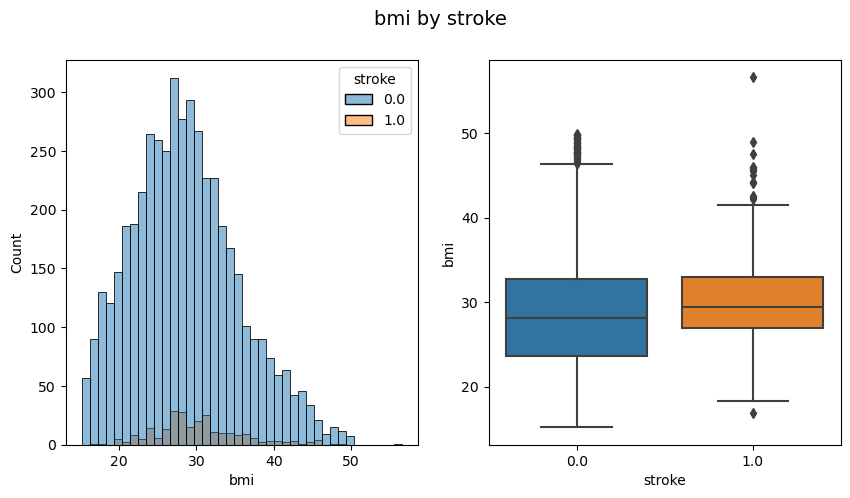

In [279]:
#Ponowne wyświetlenie histogramów i boxplotów zmiennych ilościowych po usunięciu ze zbioru wartości odstających.
columns1 = ["age","avg_glucose_level","bmi"]

for col in columns1:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=df_no_outl_iqr, x=col, hue='stroke', ax=ax1)
    sns.boxplot(data=df_no_outl_iqr, x='stroke', y=col, ax=ax2)
    fig.suptitle(f'{col} by stroke', fontsize=14)
    plt.show()

In [280]:
#Podzielenie zbioru danych na zbiór treningowy i testowy.
X_train, X_test, y_train, y_test = train_test_split(df_no_outl_iqr.drop(columns=['stroke']),
                                                    df_no_outl_iqr['stroke'], test_size=0.2, random_state=0)

#Przypisanie do zmiennej nazw kolumn, które mają typ ilościowy.
var_num = X_train.select_dtypes(include=['int64', 'float64']).columns
var_num

Index(['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

>LogisticRegression 0.229 (0.009)
>BaggingClassifier 0.241 (0.036)
>RandomForestClassifier 0.237 (0.019)
>AdaBoostClassifier 0.231 (0.015)
>XGBClassifier 0.254 (0.027)
>LGBMClassifier 0.257 (0.028)


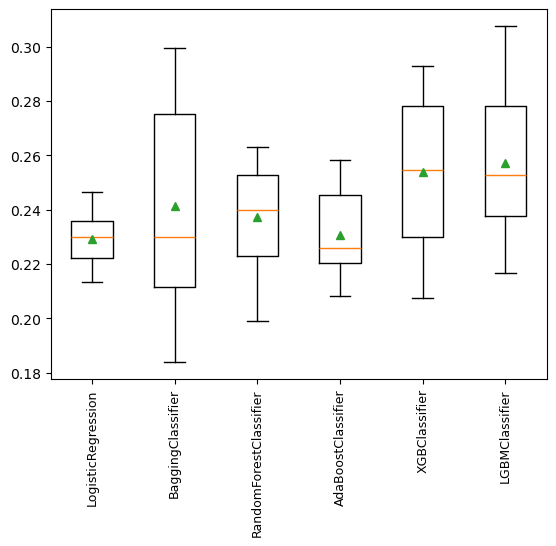

In [281]:
#Sprawdzenie, który z wybranych klasyfikatorów z ustawionymi bazowymi hiperparametrami osiągnie najlepszy wynik pod kątem metryki "f1-score".
results = list()
for i in range(len(names)):
    transformation_steps = [('n', MinMaxScaler(), var_num)]
    ct = ColumnTransformer(transformation_steps)
    pipeline = Pipeline(
        steps=[
            ('transform', ct),
            ('smoteenn', SMOTEENN(random_state=1234)),
            ('model', models[i])
        ])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(fontsize=9, rotation = 90)
plt.show()

In [115]:
#Konfiguracja zakresu hiperparametrów XGBClassifier.
def objective_XGBClassifier(trial, X_train, y_train, X_test, y_test):
    params = {
        'booster': trial.suggest_categorical("booster", ["gbtree", "dart", "gblinear"]),
        'n_estimators': trial.suggest_int("n_estimators", 1, 1000),
        'reg_alpha': trial.suggest_int("reg_alpha", 0, 300),
        'reg_lambda': trial.suggest_int("reg_lambda", 0, 300),
        'learning_rate': trial.suggest_float("learning_rate", 0.0, 1.0),
        'max_depth': trial.suggest_int("max_depth", 1, 300),
        'subsample': trial.suggest_float("subsample", 1e-10, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 1e-10, 1.0),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 300),
        'gamma': trial.suggest_float('gamma', 1e-10, 5.0, log=True)
    }

    model = XGBClassifier(**params)

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

In [116]:
#Uruchomienie szukania potecjnalnie najlepszych hiperparametrów XGBClassifier.
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=123))
study.optimize(lambda trial: objective_XGBClassifier(trial, X_train, y_train, X_test, y_test), n_trials=250, n_jobs=-1)

[I 2023-12-28 22:27:00,361] A new study created in memory with name: no-name-e65e809d-23f6-45c2-b7b3-6bb84b892548
[I 2023-12-28 22:27:01,194] Trial 3 finished with value: 0.10028929604628736 and parameters: {'booster': 'gblinear', 'n_estimators': 121, 'reg_alpha': 0, 'reg_lambda': 58, 'learning_rate': 0.9701635299145158, 'max_depth': 215, 'subsample': 0.5330408453289032, 'colsample_bytree': 0.13682436594583508, 'min_child_weight': 2, 'gamma': 0.0011000842520681945}. Best is trial 3 with value: 0.10028929604628736.
[I 2023-12-28 22:27:01,333] Trial 10 finished with value: 0.10028929604628736 and parameters: {'booster': 'gblinear', 'n_estimators': 139, 'reg_alpha': 208, 'reg_lambda': 269, 'learning_rate': 0.37269696118696394, 'max_depth': 300, 'subsample': 0.14392717697785307, 'colsample_bytree': 0.9576679183877119, 'min_child_weight': 243, 'gamma': 0.003954165893231484}. Best is trial 3 with value: 0.10028929604628736.
[I 2023-12-28 22:27:01,711] Trial 11 finished with value: 0.10028929

In [117]:
#Wyświetlenie najlepszych znalezionych hiperparametrów XGBClassifier.
best_params = study.best_params
print(best_params, study.best_value)

{'booster': 'gbtree', 'n_estimators': 974, 'reg_alpha': 0, 'reg_lambda': 155, 'learning_rate': 0.8210750759126363, 'max_depth': 239, 'subsample': 0.41232832343672665, 'colsample_bytree': 0.5876587535661887, 'min_child_weight': 53, 'gamma': 1.226305617179873e-05} 0.2857142857142857


In [119]:
#Zbudowanie modelu z użyciem XGBClassifier z ustawionymi znalezionymi hiperparametrami i wyświetlenie metryk oceniających jego jakość.
model = XGBClassifier(**best_params)
pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_test))
print("Confussion_matrix:\n", confusion_matrix(y_test, y_pred_test))
print('ROC AUC score:', roc_auc_score(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.80      0.89       933
         1.0       0.18      0.75      0.29        52

    accuracy                           0.80       985
   macro avg       0.58      0.78      0.59       985
weighted avg       0.94      0.80      0.85       985

Confussion_matrix:
 [[751 182]
 [ 13  39]]
ROC AUC score: 0.777465166130761


In [256]:
#Ponowna konfiguracja zakresu hiperparametrów LGBMClassifier. W pipelinie tej funkcji znajduje się dodatkowo MinMaxScaler.
def objective_LGBMClassifier_MinMaxScaler(trial, X_train, y_train, X_test, y_test):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical("boosting_type", ["gbdt", "dart", "rf"]),
        'n_estimators': trial.suggest_int("n_estimators", 1, 1000),
        'lambda_l1': trial.suggest_float("lambda_l1", 1e-10, 10.0, log=True),
        'lambda_l2': trial.suggest_float("lambda_l2", 1e-10, 10.0, log=True),
        'learning_rate': trial.suggest_float("learning_rate", 1e-10, 10.0, log=True),
        'num_leaves': trial.suggest_int("num_leaves", 2, 300),
        'feature_fraction': trial.suggest_float("feature_fraction", 0.1, 1.0),
        'bagging_fraction': trial.suggest_float("bagging_fraction", 0.1, 1.0),
        'bagging_freq': trial.suggest_int("bagging_freq", 1, 20),
        'min_child_samples': trial.suggest_int("min_child_samples", 1, 300),
        'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 1, 300),
        'max_depth': trial.suggest_int("n_estimators", 1, 300),
        'class_weight': trial.suggest_categorical("class_weight", ["balanced", None]),
        'subsample': trial.suggest_float("subsample", 1e-10, 1.0),
        'reg_alpha': trial.suggest_float("reg_alpha", 1e-10, 1.0),
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-10, 1.0),
        'min_split_gain': trial.suggest_float("min_split_gain", 0.0001, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.0001, 1.0),
        'min_child_weight': trial.suggest_float("min_child_weight", 0.0001, 1.0)
    }

    model = LGBMClassifier(**params)

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

In [257]:
#Uruchomienie szukania potecjnalnie najlepszych hiperparametrów LGBMClassifier.
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=123))
study.optimize(lambda trial: objective_LGBMClassifier_MinMaxScaler(trial, X_train, y_train, X_test, y_test), n_trials=250, n_jobs=-1)

[I 2023-12-29 01:31:03,725] A new study created in memory with name: no-name-85bd5d07-8030-49f6-be6a-7da5af422ab2
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 1000}
  warnings.warn(
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all follow

In [259]:
#Wyświetlenie najlepszych znalezionych hiperparametrów LGBMClassifier.
best_params = study.best_params
print(best_params, study.best_value)

{'boosting_type': 'gbdt', 'n_estimators': 292, 'lambda_l1': 5.5182105087318164e-09, 'lambda_l2': 1.8629586821074647e-05, 'learning_rate': 0.07507092208491307, 'num_leaves': 270, 'feature_fraction': 0.2928135793215925, 'bagging_fraction': 0.8989892037331711, 'bagging_freq': 16, 'min_child_samples': 260, 'min_data_in_leaf': 9, 'class_weight': 'balanced', 'subsample': 0.5084615150698226, 'reg_alpha': 0.5374072950579876, 'reg_lambda': 0.6860356484269816, 'min_split_gain': 0.37657056879129114, 'colsample_bytree': 0.1119375461149297, 'min_child_weight': 0.457537451058168} 0.3493975903614458


In [261]:
#Zbudowanie modelu z użyciem LGBMClassifier z ustawionymi znalezionymi hiperparametrami i wyświetlenie metryk oceniających jego jakość.
model = LGBMClassifier(**best_params)
pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('smoteenn', SMOTEENN(random_state=1234)),
        ('model', model)
    ])

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_test))
print("Confussion_matrix:\n", confusion_matrix(y_test, y_pred_test))
print('ROC AUC score:', roc_auc_score(y_test, y_pred_test))

[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=260 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction is set=0.2928135793215925, colsample_bytree=0.1119375461149297 will be ignored. Current value: feature_fraction=0.2928135793215925
[LightGBM] [Warning] lambda_l1 is set=5.5182105087318164e-09, reg_alpha=0.5374072950579876 will be ignored. Current value: lambda_l1=5.5182105087318164e-09
[LightGBM] [Warning] lambda_l2 is set=1.8629586821074647e-05, reg_lambda=0.6860356484269816 will be ignored. Current value: lambda_l2=1.8629586821074647e-05
[LightGBM] [Warning] bagging_fraction is set=0.8989892037331711, subsample=0.5084615150698226 will be ignored. Current value: bagging_fraction=0.8989892037331711
[LightGBM] [Warning] bagging_freq is set=16, subsample_freq=0 will be ignored. Current value: bagging_freq=16
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=260 will be ignored. Current value: min_data_in_leaf=9
[Lig

In [194]:
#Ze względu na to, że nie mam odpowiedniej wiedzy medycznej potrzebnej do ocenienia jakie wartości odstające mogę usunąć ze zbioru, 
#stwierdziłem, że w przypadku budowy tego modelu kwestie usunięcia wartości odstających ze zbioru pozostawie algorytmowi Isolation Forest.
from sklearn.ensemble import IsolationForest

In [195]:
#Ponowne utworzenie kopii df_num_impKNN, aby z kolejnego, nowego zbioru usunąć wartości odstające, ale metodą Isolation Forest.
df_no_outl_if = df_num_impKNN.copy()
df_no_outl_if

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.000,0.000,1.000,1.000,228.690,36.600,2.000,1.000
1,61.000,0.000,0.000,0.000,202.210,34.480,1.000,1.000
2,80.000,0.000,1.000,1.000,105.920,32.500,1.000,1.000
3,49.000,0.000,0.000,1.000,171.230,34.400,3.000,1.000
4,79.000,1.000,0.000,0.000,174.120,24.000,1.000,1.000
...,...,...,...,...,...,...,...,...
5104,80.000,1.000,0.000,1.000,83.750,26.995,1.000,0.000
5105,81.000,0.000,0.000,0.000,125.200,40.000,1.000,0.000
5106,35.000,0.000,0.000,0.000,82.990,30.600,1.000,0.000
5107,51.000,0.000,0.000,1.000,166.290,25.600,2.000,0.000


In [196]:
#Utworzenie dwóch nowych zbiorów danych.
#Pierwszy zbiór zawiera tylko osoby, które miały udar mózgu.
#Drugi zbiór nie zawiera osób, które miały udar mózgu - na nim zastosowano metodę Isolation Forest. Tylko na nim zastosowano tę metodę, gdyż
#po zastosowaniu jej na cały zbiór (zawierający osoby, które miały i nie miały udaru mózgu) usuwała ona wszystkie osoby, co miały udar mózgu.
df_no_outl_if_stroke1 = df_no_outl_if[df_no_outl_if["stroke"] == 1]
df_no_outl_if = df_no_outl_if[df_no_outl_if["stroke"] == 0]
df_no_outl_if

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
249,3.000,0.000,0.000,0.000,95.120,18.000,0.000,0.000
250,58.000,1.000,0.000,1.000,87.960,39.200,1.000,0.000
251,8.000,0.000,0.000,1.000,110.890,17.600,0.000,0.000
252,70.000,0.000,0.000,1.000,69.040,35.900,2.000,0.000
253,14.000,0.000,0.000,0.000,161.280,19.100,0.000,0.000
...,...,...,...,...,...,...,...,...
5104,80.000,1.000,0.000,1.000,83.750,26.995,1.000,0.000
5105,81.000,0.000,0.000,0.000,125.200,40.000,1.000,0.000
5106,35.000,0.000,0.000,0.000,82.990,30.600,1.000,0.000
5107,51.000,0.000,0.000,1.000,166.290,25.600,2.000,0.000


In [197]:
#Uruchomienie Isolation Forest.
clf = IsolationForest(n_estimators = 10000, bootstrap = True, n_jobs=-1, random_state = 123)
clf.fit(df_no_outl_if)
isf_pred = clf.predict(df_no_outl_if)

In [198]:
#Wyświetlenie tego ile wartości Isolation Forest uznał za odstające, a ile nie i jaki jest stosunek wartości odstających do wszystkich 
#wartości w zbiorze.
unique, counts = np.unique(isf_pred, return_counts=True)
print(np.asarray((unique, counts)).T)
print("Stosunek wartości odstających do wszystkich wartości w zbiorze:") 
np.round((len(isf_pred[isf_pred == -1])/df_no_outl_if.shape[0])*100,3)

[[  -1 1304]
 [   1 3556]]
Stosunek wartości odstających do wszystkich wartości w zbiorze:


26.831

In [199]:
#Wyświetlenie wartości, które Isolation Forest uznał za nieodstające.
df_no_outl_if = df_no_outl_if[isf_pred == 1]
df_no_outl_if

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
249,3.000,0.000,0.000,0.000,95.120,18.000,0.000,0.000
252,70.000,0.000,0.000,1.000,69.040,35.900,2.000,0.000
255,52.000,0.000,0.000,1.000,77.590,17.700,2.000,0.000
257,32.000,0.000,0.000,1.000,77.670,32.300,3.000,0.000
261,37.000,0.000,0.000,1.000,162.960,39.400,1.000,0.000
...,...,...,...,...,...,...,...,...
5101,57.000,0.000,0.000,1.000,77.930,21.700,1.000,0.000
5103,13.000,0.000,0.000,0.000,103.080,18.600,0.000,0.000
5106,35.000,0.000,0.000,0.000,82.990,30.600,1.000,0.000
5107,51.000,0.000,0.000,1.000,166.290,25.600,2.000,0.000


In [200]:
#Utworzenie nowego zbioru danych składającego sie ze zbioru, na którym zastosowano Isolation Forest i ze zbioru, który zawiera osoby, które 
#miały udar mózgu.
df_no_outl_if_concat = pd.concat([df_no_outl_if, df_no_outl_if_stroke1], ignore_index=True)
df_no_outl_if_concat

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,3.000,0.000,0.000,0.000,95.120,18.000,0.000,0.000
1,70.000,0.000,0.000,1.000,69.040,35.900,2.000,0.000
2,52.000,0.000,0.000,1.000,77.590,17.700,2.000,0.000
3,32.000,0.000,0.000,1.000,77.670,32.300,3.000,0.000
4,37.000,0.000,0.000,1.000,162.960,39.400,1.000,0.000
...,...,...,...,...,...,...,...,...
3800,57.000,0.000,0.000,1.000,84.960,36.700,0.000,1.000
3801,14.000,0.000,0.000,0.000,57.930,30.900,0.000,1.000
3802,75.000,0.000,0.000,0.000,78.800,29.300,2.000,1.000
3803,71.000,1.000,0.000,0.000,87.800,30.230,0.000,1.000


In [201]:
#Wyświetlenie unikatowych wartości zbioru, który nie ma usuniętych wartości odstających (df_num_impKNN) i zbioru, który ma usunięte wartości
#odstające (df_no_outl_if_concat).
n1 = df_num_impKNN.nunique()
n1 = pd.DataFrame(n1)
n1.columns = ['df_num_impKNN.nunique']

n2 = df_no_outl_if_concat.nunique()
n2 = pd.DataFrame(n2)
n2.columns = ['df_no_outl_if_concat.nunique']

n_all = pd.concat([n1, n2], axis = 1)
n_all

,df_num_impKNN.nunique,df_no_outl_if_concat.nunique
age,104,104
hypertension,2,2
heart_disease,2,2
work_type,2,2
avg_glucose_level,3978,3004
bmi,604,429
smoking_status,4,4
stroke,2,2


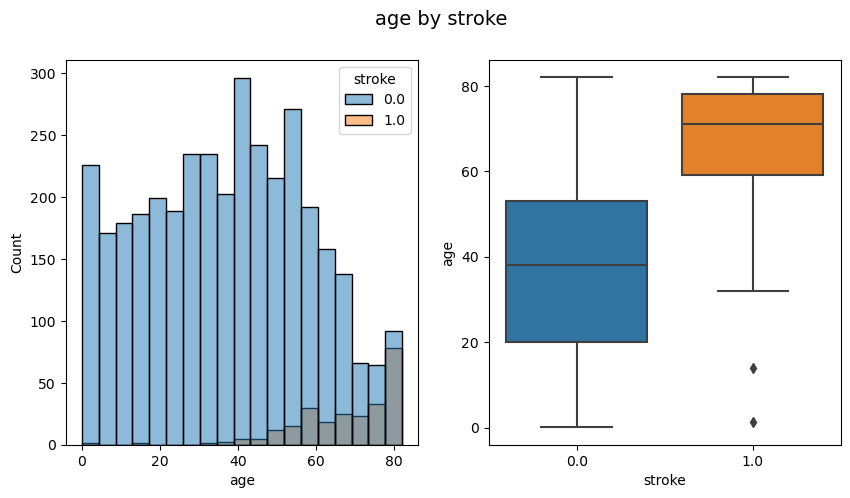

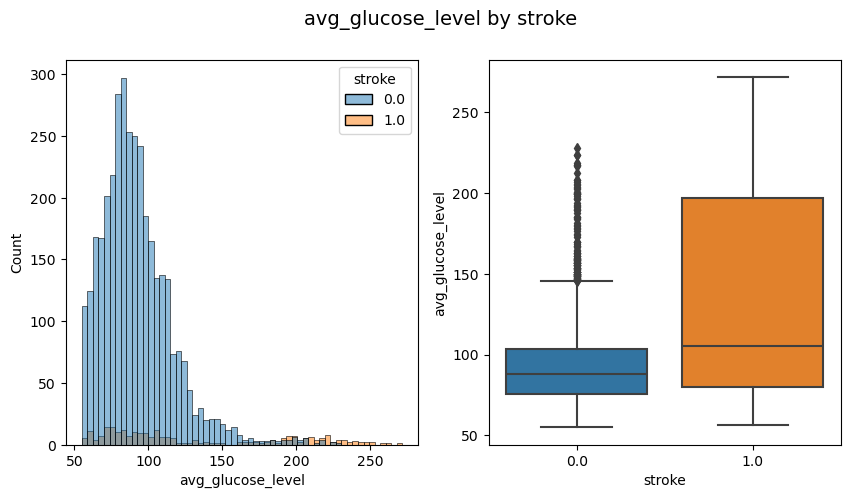

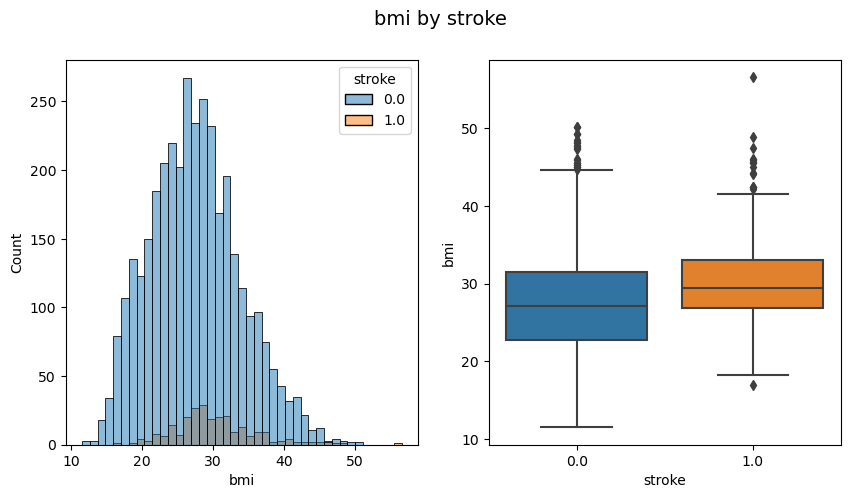

In [202]:
#Ponowne wyświetlenie histogramów i boxplotów zmiennych ilościowych po usunięciu ze zbioru wartości odstających.
columns1 = ["age","avg_glucose_level","bmi"]

for col in columns1:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=df_no_outl_if_concat, x=col, hue='stroke', ax=ax1)
    sns.boxplot(data=df_no_outl_if_concat, x='stroke', y=col, ax=ax2)
    fig.suptitle(f'{col} by stroke', fontsize=14)
    plt.show()

In [203]:
#Podzielenie zbioru danych na zbiór treningowy i testowy.
X_train, X_test, y_train, y_test = train_test_split(df_no_outl_if_concat.drop(columns=['stroke']),
                                                    df_no_outl_if_concat['stroke'], test_size=0.2, random_state=0)

#Przypisanie do zmiennej nazw kolumn, które mają typ ilościowy.
var_num = X_train.select_dtypes(include=['int64', 'float64']).columns
var_num

Index(['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

>LogisticRegression 0.660 (0.062)
>BaggingClassifier 0.654 (0.061)
>RandomForestClassifier 0.678 (0.059)
>AdaBoostClassifier 0.643 (0.072)
>XGBClassifier 0.640 (0.061)
>LGBMClassifier 0.657 (0.053)


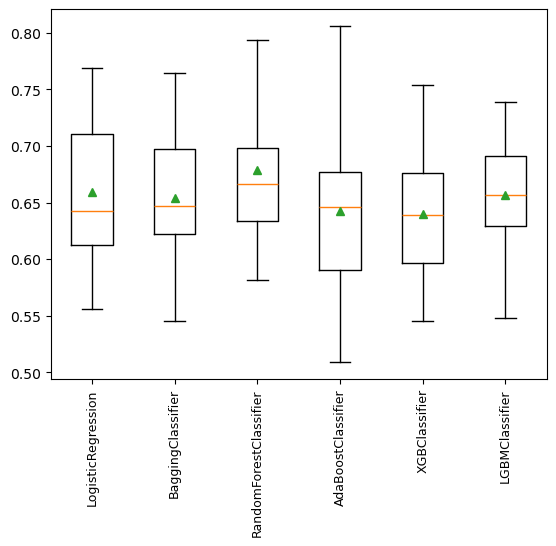

In [204]:
#Sprawdzenie, który z wybranych klasyfikatorów z ustawionymi bazowymi hiperparametrami osiągnie najlepszy wynik pod kątem metryki "f1-score".
#Usunąłem pipelina w pętli, gdyż według przeprowadzonych przeze mnie testów żaden scaler, ani metoda balansująca zbiór, nie poprawiły wyniku
#klasyfikatorów wypisywanych po zakończeniu działania tego kodu.
results = list()
for i in range(len(names)):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
    scores = cross_val_score(models[i], X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(fontsize=9, rotation = 90)
plt.show()

In [205]:
#Konfiguracja zakresu hiperparametrów RandomForestClassifier.
def objective_RandomForestClassifier(trial, X_train, y_train, X_test, y_test):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 1, 1000),
        'criterion': trial.suggest_categorical("criterion", ["gini", "entropy"]),
        'min_samples_split': trial.suggest_int("min_samples_split", 2, 300),
        'min_samples_leaf': trial.suggest_float("min_samples_leaf", 1e-10, 1.0),
        'max_features': trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        'class_weight': trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None]),
        'bootstrap': trial.suggest_categorical("bootstrap", [True, False]),
        'max_depth': trial.suggest_int("max_depth", 1, 300),
    }

    model = RandomForestClassifier(**params)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

In [206]:
#Uruchomienie szukania potecjnalnie najlepszych hiperparametrów RandomForestClassifier.
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=123))
study.optimize(lambda trial: objective_RandomForestClassifier(trial, X_train, y_train, X_test, y_test), n_trials=400, n_jobs=-1)

[I 2023-12-29 00:24:47,997] A new study created in memory with name: no-name-24f3f665-c36e-4daf-90ef-810f3281d62b
[I 2023-12-29 00:24:50,294] Trial 2 finished with value: 0.2918918918918919 and parameters: {'n_estimators': 9, 'criterion': 'entropy', 'min_samples_split': 140, 'min_samples_leaf': 0.2325506656916554, 'max_features': None, 'class_weight': 'balanced_subsample', 'bootstrap': True, 'max_depth': 141}. Best is trial 2 with value: 0.2918918918918919.
[I 2023-12-29 00:24:52,134] Trial 6 finished with value: 0.24944320712694878 and parameters: {'n_estimators': 105, 'criterion': 'entropy', 'min_samples_split': 285, 'min_samples_leaf': 0.4885499783505202, 'max_features': None, 'class_weight': 'balanced_subsample', 'bootstrap': False, 'max_depth': 209}. Best is trial 2 with value: 0.2918918918918919.
[I 2023-12-29 00:24:53,002] Trial 9 finished with value: 0.0 and parameters: {'n_estimators': 225, 'criterion': 'entropy', 'min_samples_split': 67, 'min_samples_leaf': 0.6307841081644995

In [207]:
#Wyświetlenie najlepszych znalezionych hiperparametrów RandomForestClassifier.
best_params = study.best_params
print(best_params, study.best_value)

{'n_estimators': 287, 'criterion': 'entropy', 'min_samples_split': 26, 'min_samples_leaf': 0.0012506707024711509, 'max_features': 'log2', 'class_weight': None, 'bootstrap': False, 'max_depth': 45} 0.6352941176470588


In [210]:
#Zbudowanie modelu z użyciem RandomForestClassifier z ustawionymi znalezionymi hiperparametrami i wyświetlenie metryk oceniających jego 
#jakość.
model = RandomForestClassifier(**best_params)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

print(classification_report(y_test, y_pred_test))
print("Confussion_matrix:\n", confusion_matrix(y_test, y_pred_test))
print('ROC AUC score:', roc_auc_score(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       704
         1.0       0.96      0.47      0.64        57

    accuracy                           0.96       761
   macro avg       0.96      0.74      0.81       761
weighted avg       0.96      0.96      0.95       761

Confussion_matrix:
 [[703   1]
 [ 30  27]]
ROC AUC score: 0.7361318779904306


In [211]:
#Ponowna konfiguracja zakresu hiperparametrów LGBMClassifier. Tym razem w funkcji nie zawarto pipelinu.
def objective_LGBMClassifier_None(trial, X_train, y_train, X_test, y_test):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical("boosting_type", ["gbdt", "dart", "rf"]),
        'n_estimators': trial.suggest_int("n_estimators", 1, 1000),
        'lambda_l1': trial.suggest_float("lambda_l1", 1e-10, 10.0, log=True),
        'lambda_l2': trial.suggest_float("lambda_l2", 1e-10, 10.0, log=True),
        'learning_rate': trial.suggest_float("learning_rate", 1e-10, 10.0, log=True),
        'num_leaves': trial.suggest_int("num_leaves", 2, 300),
        'feature_fraction': trial.suggest_float("feature_fraction", 0.1, 1.0),
        'bagging_fraction': trial.suggest_float("bagging_fraction", 0.1, 1.0),
        'bagging_freq': trial.suggest_int("bagging_freq", 1, 20),
        'min_child_samples': trial.suggest_int("min_child_samples", 1, 300),
        'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 1, 300),
        'max_depth': trial.suggest_int("n_estimators", 1, 300),
        'class_weight': trial.suggest_categorical("class_weight", ["balanced", None]),
        'subsample': trial.suggest_float("subsample", 1e-10, 1.0),
        'reg_alpha': trial.suggest_float("reg_alpha", 1e-10, 1.0),
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-10, 1.0),
        'min_split_gain': trial.suggest_float("min_split_gain", 0.0001, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.0001, 1.0),
        'min_child_weight': trial.suggest_float("min_child_weight", 0.0001, 1.0)
    }

    model = LGBMClassifier(**params)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

In [212]:
#Uruchomienie szukania potecjnalnie najlepszych hiperparametrów LGBMClassifier.
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=123))
study.optimize(lambda trial: objective_LGBMClassifier_None(trial, X_train, y_train, X_test, y_test), n_trials=400, n_jobs=-1)

[I 2023-12-29 00:35:58,170] A new study created in memory with name: no-name-0ea07275-c5e4-4fe7-aa4c-051e015ea84d
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 1000}
  warnings.warn(
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all follow

In [213]:
#Wyświetlenie najlepszych znalezionych hiperparametrów LGBMClassifier.
best_params = study.best_params
print(best_params, study.best_value)

{'boosting_type': 'rf', 'n_estimators': 461, 'lambda_l1': 2.032763867845453, 'lambda_l2': 0.026330515326906986, 'learning_rate': 0.009337960384594179, 'num_leaves': 222, 'feature_fraction': 0.5158250753394692, 'bagging_fraction': 0.8359682086811142, 'bagging_freq': 12, 'min_child_samples': 157, 'min_data_in_leaf': 16, 'class_weight': None, 'subsample': 0.8549844834356848, 'reg_alpha': 0.00013402555265967092, 'reg_lambda': 0.5495230892331089, 'min_split_gain': 0.018219758960916863, 'colsample_bytree': 0.19432381361987416, 'min_child_weight': 0.429358450322332} 0.673913043478261


In [214]:
#Zbudowanie modelu z użyciem LGBMClassifier z ustawionymi znalezionymi hiperparametrami i wyświetlenie metryk oceniających jego jakość.
model = LGBMClassifier(**best_params)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

print(classification_report(y_test, y_pred_test))
print("Confussion_matrix:\n", confusion_matrix(y_test, y_pred_test))
print('ROC AUC score:', roc_auc_score(y_test, y_pred_test))

[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=157 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.5158250753394692, colsample_bytree=0.19432381361987416 will be ignored. Current value: feature_fraction=0.5158250753394692
[LightGBM] [Warning] lambda_l1 is set=2.032763867845453, reg_alpha=0.00013402555265967092 will be ignored. Current value: lambda_l1=2.032763867845453
[LightGBM] [Warning] lambda_l2 is set=0.026330515326906986, reg_lambda=0.5495230892331089 will be ignored. Current value: lambda_l2=0.026330515326906986
[LightGBM] [Warning] bagging_fraction is set=0.8359682086811142, subsample=0.8549844834356848 will be ignored. Current value: bagging_fraction=0.8359682086811142
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=157 will be ignored. Current value: min_data_in_leaf=16
[LightGBM